In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bikePrices.xlsx")

In [3]:
dataFrame

,Price,BikeFeature1,BikeFeature2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

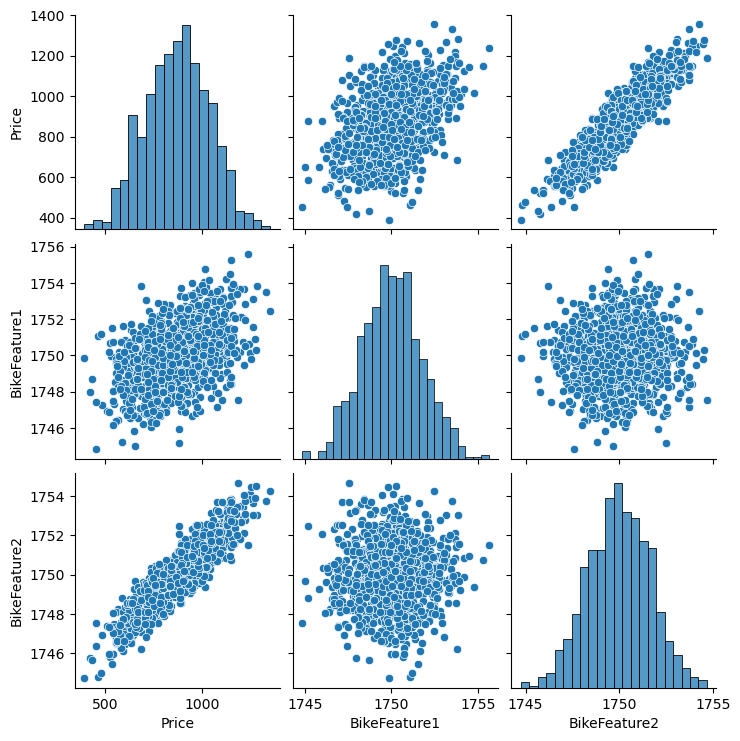

In [5]:
sbn.pairplot(dataFrame)

## Data Test / Train

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#train_test_split

In [8]:
# y = wx + b
# y -> label
y = dataFrame["Price"].values

# x -> feature 
x = dataFrame[["BikeFeature1","BikeFeature2"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

In [9]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [10]:
x_train.shape

(670, 2)

In [11]:
x_test.shape

(330, 2)

In [12]:
y_train.shape

(670,)

In [13]:
y_test.shape

(330,)

## Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(x_train)

MinMaxScaler()

In [17]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [22]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 790466.5000   
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 789139.5625 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 779011.2500 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 798907.5625 
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 781022.2500 
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 794039.6250 
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 804808.2500 
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 777409.2500 
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 795356.5625 
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 800399.1875 
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 800988.2500 
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 793930.5625 
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 807561.5625 
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [23]:
loss=model.history.history["loss"]

<Axes: >

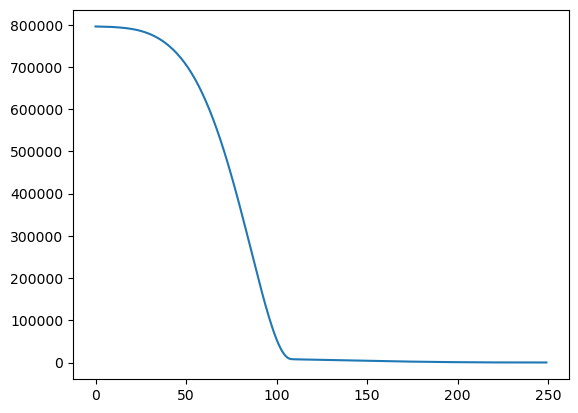

In [24]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [25]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [26]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [27]:
trainLoss

75.5552749633789

In [28]:
testLoss

80.41390991210938

In [29]:
testPredictions = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [30]:
testPredictions

array([[1075.511  ],
       [ 624.4599 ],
       [ 875.00885],
       [ 893.914  ],
       [ 899.2902 ],
       [ 454.77286],
       [ 929.9997 ],
       [ 990.044  ],
       [ 939.16614],
       [1014.9843 ],
       [ 750.6544 ],
       [ 916.07434],
       [ 946.7041 ],
       [1052.433  ],
       [1118.2042 ],
       [ 682.20514],
       [1125.0532 ],
       [ 652.4636 ],
       [1152.6135 ],
       [ 885.4101 ],
       [ 891.8297 ],
       [ 716.3428 ],
       [ 458.04147],
       [ 613.76447],
       [ 834.00287],
       [1088.507  ],
       [ 714.2061 ],
       [ 757.0607 ],
       [ 873.0461 ],
       [ 770.65173],
       [ 453.6705 ],
       [ 782.427  ],
       [ 728.49255],
       [ 647.86945],
       [ 885.9511 ],
       [ 843.25775],
       [1033.5944 ],
       [1021.47174],
       [ 844.0125 ],
       [ 861.70245],
       [ 756.948  ],
       [1172.1248 ],
       [1095.2156 ],
       [1085.3679 ],
       [ 871.4997 ],
       [ 597.56793],
       [1143.9482 ],
       [ 972.

In [31]:
predictionsDf = pd.DataFrame(y_test,columns=["Real Y"])

In [32]:
predictionsDf

,Real Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [33]:
testPredictions = pd.Series(testPredictions.reshape(330,))

In [34]:
testPredictions

0      1075.510986
1       624.459900
2       875.008850
3       893.914001
4       899.290222
          ...     
325    1011.533691
326     791.005432
327     765.491272
328    1164.464355
329     803.143250
Length: 330, dtype: float32

In [35]:
predictionsDf = pd.concat([predictionsDf,testPredictions],axis=1)

In [36]:
predictionsDf

,Real Y,0
0,1081.652164,1075.510986
1,622.675990,624.459900
2,889.356810,875.008850
3,902.826733,893.914001
4,897.662404,899.290222
...,...,...
325,1028.438035,1011.533691
326,789.934950,791.005432
327,758.490486,765.491272
328,1172.871659,1164.464355


In [37]:
predictionsDf.columns = ["Real Y","Prediction Y"]

In [38]:
predictionsDf

,Real Y,Prediction Y
0,1081.652164,1075.510986
1,622.675990,624.459900
2,889.356810,875.008850
3,902.826733,893.914001
4,897.662404,899.290222
...,...,...
325,1028.438035,1011.533691
326,789.934950,791.005432
327,758.490486,765.491272
328,1172.871659,1164.464355


<Axes: xlabel='Real Y', ylabel='Prediction Y'>

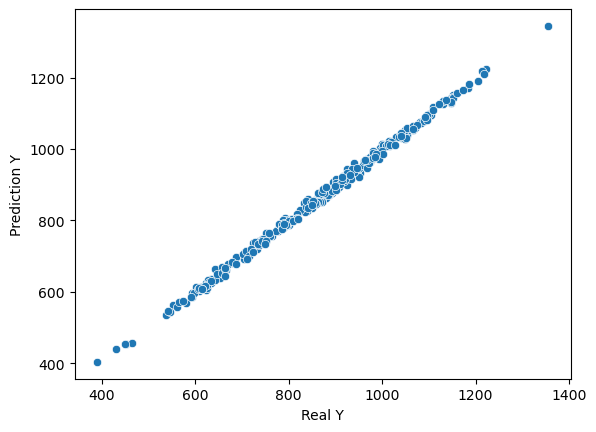

In [39]:
sbn.scatterplot(x="Real Y",y="Prediction Y", data= predictionsDf)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mean_absolute_error(predictionsDf['Real Y'],predictionsDf["Prediction Y"])

7.202404896602746

In [42]:
mean_squared_error(predictionsDf['Real Y'],predictionsDf["Prediction Y"])

80.41391394325446

In [43]:
dataFrame.describe()

,Price,BikeFeature1,BikeFeature2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [44]:
newBike=[[1750,1751]]

In [45]:
newBike = scaler.transform(newBike)

In [46]:
newBike

array([[0.47099003, 0.62095915]])

In [47]:
model.predict(newBike)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[961.5314]], dtype=float32)

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save("bike_model.keras")

In [50]:
calledModel = load_model("bike_model.keras")

In [51]:
calledModel.predict(newBike)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[961.5314]], dtype=float32)